<a href="https://colab.research.google.com/github/Umeshtheru/green-hydrogen/blob/main/DL_NN_Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [241]:
breast_cancer_dataset=sklearn.datasets.load_breast_cancer()

In [242]:
data_frame=pd.DataFrame(breast_cancer_dataset.data,columns=breast_cancer_dataset.feature_names)
data_frame['label']=breast_cancer_dataset.target
data_frame.isnull().sum()
data_frame.groupby('label').mean()
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [243]:
X=data_frame.drop(columns='label',axis=1)
Y=data_frame['label']


In [244]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (455, 30) (114, 30)


In [245]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_train_std

array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

setting of layers of neural netwrok

In [246]:
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(30,)),
                        keras.layers.Dense(20,activation='relu'),
                        keras.layers.Dense(2,activation='sigmoid')

])

In [247]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [248]:
history = model.fit(X_train_std,Y_train,validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 21ms/step - loss: 0.4991 - accuracy: 0.7653 - val_loss: 0.3334 - val_accuracy: 0.9565
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.3678 - accuracy: 0.8778 - val_loss: 0.2512 - val_accuracy: 0.9565
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2837 - accuracy: 0.9193 - val_loss: 0.2022 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2334 - accuracy: 0.9438 - val_loss: 0.1696 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1979 - accuracy: 0.9462 - val_loss: 0.1490 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1742 - accuracy: 0.9462 - val_loss: 0.1336 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1567 - accuracy: 0.9511 - val_loss: 0.1223 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

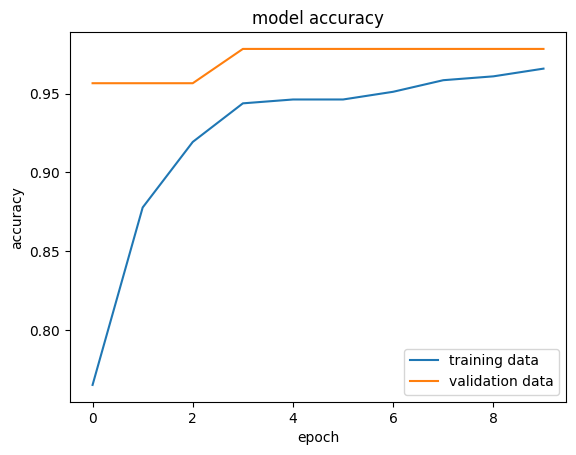

In [249]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data','validation data'], loc='lower right')

Accuracy of the model on test data

In [250]:
loss,accuracy = model.evaluate(X_test_std,Y_test)
print(accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.1247 - accuracy: 0.9561
0.9561403393745422


In [251]:
Y_pred = model.predict(X_test_std)


4/4 [==============================] - 0s 3ms/step


#argmax function
My_list=[10,20,30]
np.argmax(mylist)
ans:2
argmax reprasents the max value index


In [252]:
Y_pred_labels=[np.argmax(i)for i in Y_pred]
print(Y_pred_labels)

[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


Building the predictive system

In [254]:
input_data=(20.57,17.22,132.9,0.084,0.078,0.0869,0.07017,0.1812,0.0566,0.5435,0.7339,3.398,74.08,0.0052,0.013,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,9)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_stds = scaler.transform(input_data_reshaped)
print(input_data_stds)
prediction= model.predict(input_data_stds)
prediction_label=[np.argmax(prediction)]
print(prediction_label)
if(prediction_label[0]==0):
  print('The tumor is Malignate')
else:
  print('The tumor is benin')


[[ 1.84338767e+00 -4.91436713e-01  1.69692720e+00 -1.84423719e+00
  -1.26631282e+00 -3.17535094e-01 -2.13852379e-01  3.45446080e+00
  -4.65146429e+00  6.99364545e+01  1.20447312e+00  4.03747618e+00
   3.48480806e+01 -8.46011159e-01  1.99278983e+00 -3.77313197e-01
  -6.71346535e-01  3.87592786e-01 -2.11604760e+00  1.03984359e+04
   1.52430001e+00  2.13951319e+01  5.61328646e+01 -1.56581991e+00
   2.35871744e+00 -7.38807551e-02 -4.01637567e-01  2.46758812e+00
  -3.35403266e+00  4.93852333e+02]]
1/1 [==============================] - 0s 20ms/step
[0]
The tumor is Malignate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
